In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
assets = ['PG', 'WMT', '^GSPC', 'XOM', 'NKE']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2009-1-1')['Adj Close']
# pf = Portfolio

In [ ]:
pf_data.head()
# First 5 Adjusted Closes of assets

,PG,WMT,^GSPC,XOM,NKE
Date,,,,,
2009-01-02,45.686195,44.551342,931.799988,60.521351,9.137513
2009-01-05,45.358814,44.037106,927.450012,60.513935,9.202950
2009-01-06,45.227879,43.647526,934.700012,59.527992,9.016963
2009-01-07,44.434921,43.273548,906.650024,58.008308,8.689764
2009-01-08,43.947495,40.032310,909.729980,58.630978,8.849917


In [ ]:
pf_data.tail()
# Last 5 Adjusted closes of assets

,PG,WMT,^GSPC,XOM,NKE
Date,,,,,
2018-11-29,92.820000,96.761971,2737.800049,79.059998,74.119995
2018-11-30,94.510002,97.120010,2760.169922,79.500000,75.120003
2018-12-03,93.320000,98.214043,2790.370117,81.220001,77.940002
2018-12-04,93.309998,95.289993,2700.060059,79.430000,75.790001
2018-12-06,93.550003,94.769997,2695.949951,78.389999,75.540001


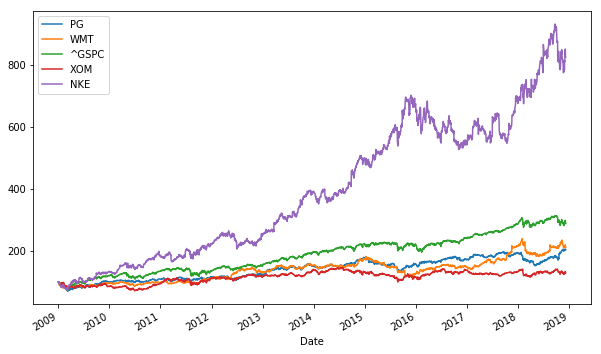

In [ ]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize = (10,6))
# .iloc is an integer function which returns only integers from DataFrame. In our case, it will return the 1st row(divides all observations with 1st row observations) multiplied by 100. 

In [ ]:
log_returns = np.log(pf_data / pf_data.shift(1))
# Taking out logarithm of daily returns for each security

In [ ]:
log_returns.mean() * 250
# Annualized Returns

PG       0.071699
WMT      0.075511
^GSPC    0.106281
XOM      0.025880
NKE      0.211312
dtype: float64

In [ ]:
log_returns.cov() * 250
# Variance-Covariance Matrix

,PG,WMT,^GSPC,XOM,NKE
PG,0.024461,0.010926,0.014418,0.013846,0.012969
WMT,0.010926,0.032059,0.012429,0.010559,0.012994
^GSPC,0.014418,0.012429,0.027060,0.023404,0.024909
XOM,0.013846,0.010559,0.023404,0.037009,0.018602
NKE,0.012969,0.012994,0.024909,0.018602,0.062265


In [ ]:
log_returns.corr()
# Correlation of individual securities

,PG,WMT,^GSPC,XOM,NKE
PG,1.000000,0.390149,0.560410,0.460197,0.332303
WMT,0.390149,1.000000,0.422002,0.306558,0.290836
^GSPC,0.560410,0.422002,1.000000,0.739565,0.606840
XOM,0.460197,0.306558,0.739565,1.000000,0.387507
NKE,0.332303,0.290836,0.606840,0.387507,1.000000


In [ ]:
number_of_assets = len(assets)
number_of_assets

5

In [ ]:
np.random.seed(40)
weights = np.random.random(number_of_assets) 
# Assigns a random number between 0-1 to each emenemt in number_of_assets
weights /= np.sum(weights)
weights

array([0.20494574, 0.02783271, 0.39639933, 0.14442935, 0.22639287])

In [ ]:
sum(weights)
# sum of weights = 1 for the portfolio

1.0

# Expected Portfolio Return

In [ ]:
# Expected return on portfolio
np.sum(weights * log_returns.mean()) * 250
# The sum .sum function of numpy allows us to sum multidimentionally.

0.11050324857254923

In [ ]:
# Expected portfolio variance
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))
# Similar to Transpose and matrix multiplication in excel

0.02264797023489791

In [ ]:
# Expected portfolio Volatility
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.15049242583897007

In [ ]:
# The secret Ingredient
pfolio_returns = []
pfolio_volatilities = []

for x in range(10000):
    weights = np.random.random(number_of_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities
# Displaying 1000 returns and corresponding volatilities in 2 arrays with different weights combination.

(array([0.10042471, 0.07227823, 0.07002282, ..., 0.08391569, 0.13790239,
        0.10922528]),
 array([0.14714955, 0.13468973, 0.13604233, ..., 0.13468846, 0.17793432,
        0.14684693]))

In [ ]:
# Greek word Portfolia
portfolia = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
portfolia
# Dictionary with 2 key value pairs

,Return,Volatility
0,0.100425,0.147150
1,0.072278,0.134690
2,0.070023,0.136042
3,0.103267,0.153390
4,0.108522,0.144135
5,0.083157,0.136809
6,0.087358,0.140366
7,0.123163,0.154137
8,0.110909,0.154178
9,0.083288,0.133452


Text(0,0.5,'Expected Return')

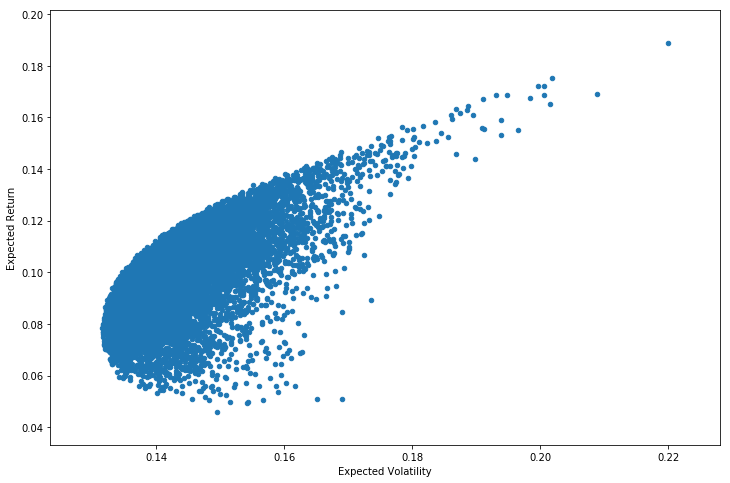

In [ ]:
portfolia.plot(x = 'Volatility', y = 'Return', kind = 'scatter', figsize = (12,8));

plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')